In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
! kaggle datasets download -d "ashfakyeafi/cat-dog-images-for-classification"

Dataset URL: https://www.kaggle.com/datasets/ashfakyeafi/cat-dog-images-for-classification
License(s): CC0-1.0
cat-dog-images-for-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-dog-images-for-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [12]:
import pandas as pd

data = pd.read_csv(r"/content/cat_dog.csv")

In [7]:
import os
import cv2
import matplotlib.pyplot as plt

In [8]:
image_folder = "/content/cat_dog"

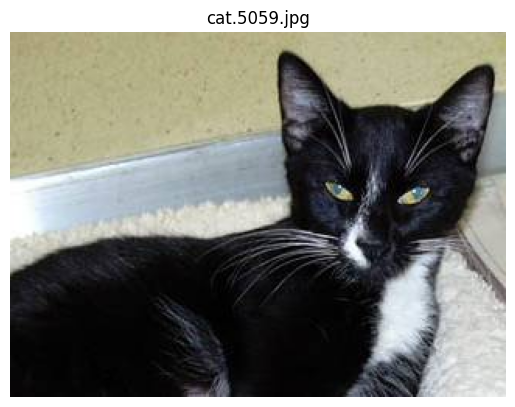

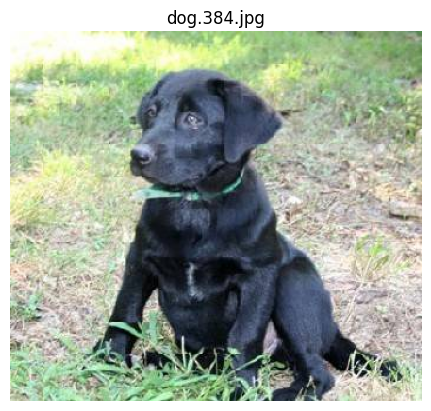

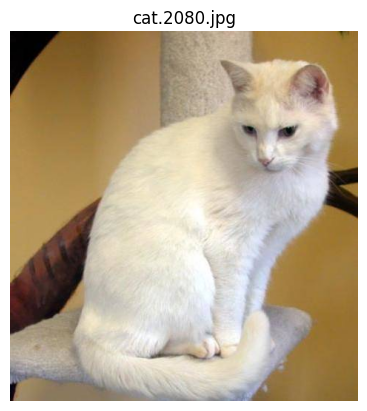

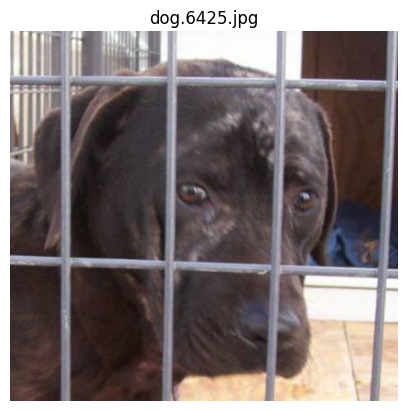

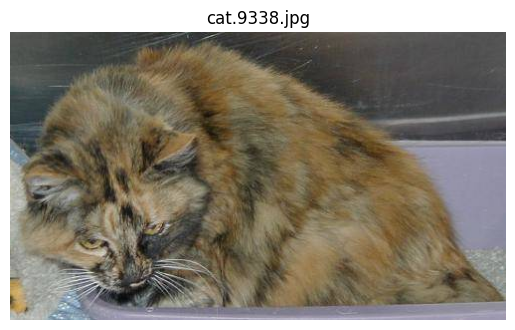

In [9]:
image_files = os.listdir(image_folder)[:5]  # Get the first 5 images
for image_file in image_files:
    img_path = os.path.join(image_folder, image_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')
    plt.show()

In [13]:
df = pd.read_csv(r"/content/cat_dog.csv")
df

,image,labels
0,dog.11289.jpg,1
1,cat.10836.jpg,0
2,cat.7970.jpg,0
3,cat.2212.jpg,0
4,dog.2653.jpg,1
...,...,...
24995,dog.12201.jpg,1
24996,dog.2893.jpg,1
24997,cat.12267.jpg,0
24998,dog.4380.jpg,1


In [14]:
image_filename = "cat.10002.jpg"

# Filter the DataFrame based on the image filename
image_row = df[df['image'] == image_filename]

# Access the label for the specific image
label = image_row['labels'].iloc[0]

print("Label for", image_filename, ":", label)

Label for cat.10002.jpg : 0


In [15]:
x=df['image']
y=df['labels']

In [16]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=0)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [17]:
import numpy as np
import imageio.v2 as imageio
from PIL import Image

In [18]:
temp = []
for img_name in train_df.image:
    img_path = os.path.join("/content/cat_dog", img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')
    temp.append(img)
train_x = np.stack(temp)

In [19]:
temp = []
for img_name in test_df.image:
    img_path = os.path.join("/content/cat_dog", img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')
    temp.append(img)
test_x = np.stack(temp)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [21]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from convolutional layers
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting

# Output Layer (binary classification: cat or dog)
model.add(Dense(1, activation='sigmoid'))

# Summary of the model architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,041 (621.25 KB)

 Trainable params: 159,041 (621.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
train_x = train_x / 255.0
test_x = test_x / 255.0

In [ ]:
history = model.fit(train_x, train_df['labels'],
                    epochs=10,
                    batch_size=32,
                    validation_data=(test_x, test_df['labels']))

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.5539 - loss: 0.6784 - val_accuracy: 0.6960 - val_loss: 0.5828
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - accuracy: 0.7280 - loss: 0.5458 - val_accuracy: 0.7539 - val_loss: 0.5088
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 45s 67ms/step - accuracy: 0.7758 - loss: 0.4816 - val_accuracy: 0.7543 - val_loss: 0.5088
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.8044 - loss: 0.4278 - val_accuracy: 0.7773 - val_loss: 0.4771
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.8193 - loss: 0.3940 - val_accuracy: 0.7876 - val_loss: 0.4719
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8483 - loss: 0.3440 - val_accuracy: 0.7948 - val_loss: 0.4615
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.8746 - loss: 0.2949 - val_accuracy: 0.8028 - val_loss: 0.4399
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - accuracy: 0.8886 - loss: 0.2664 - 

In [43]:
test_img=cv2.imread('/content/downloadcat.jfif')

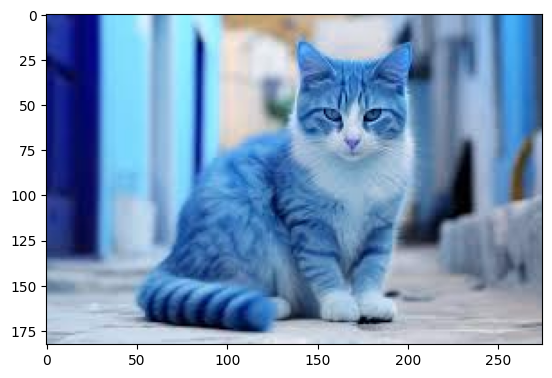

In [44]:
plt.imshow(test_img)

In [45]:
test_img.shape

(183, 275, 3)

In [46]:
test_img=cv2.resize(test_img,(32,32))

In [47]:
test_input=test_img.reshape((1,32,32,3))

In [48]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.]], dtype=float32)

In [37]:
test_img1=cv2.imread('/content/Siberian-Husky-dog.webp')

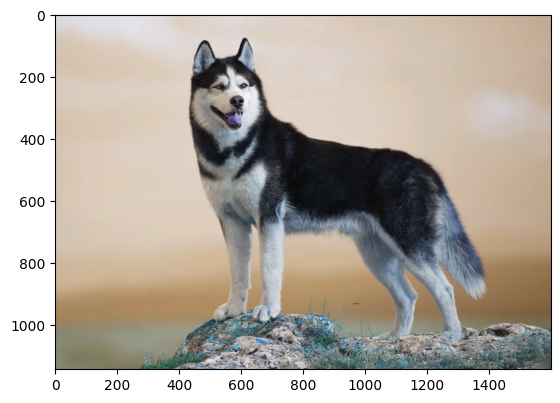

In [38]:
plt.imshow(test_img1)

In [39]:
test_img=cv2.resize(test_img,(32,32))

In [40]:
test_input=test_img.reshape((1,32,32,3))

In [42]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[1.]], dtype=float32)